In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
f='/Users/markuswiikjensen/HLE_DB22_Dataset.csv'
df=pd.read_csv(f)
df.dropna(inplace=True)

with open('/Users/markuswiikjensen/stopwords-no.txt') as stops:
    stoppeord = stops.read().splitlines() 

v_tr= TfidfVectorizer(min_df=1, stop_words=stoppeord)
tfidf_text = v_tr.fit_transform(df['Subtitle'])
text_vocab =v_tr.get_feature_names()

/Users/markuswiikjensen/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [2]:
N = range(1,10)
for n in N:
    svd = TruncatedSVD(n_components=n,n_iter=100, random_state=42)
    svd.fit_transform(tfidf_text)
    print(svd.explained_variance_ratio_)

[0.00152292]
[0.00152292 0.00268962]
[0.00152292 0.00268962 0.00256791]
[0.00152292 0.00268962 0.00256791 0.00192498]
[0.00152292 0.00268962 0.00256791 0.00192498 0.0017485 ]
[0.00152292 0.00268962 0.00256791 0.00192498 0.0017485  0.00163463]
[0.00152292 0.00268962 0.00256791 0.00192498 0.0017485  0.00163463
 0.00158185]
[0.00152292 0.00268962 0.00256791 0.00192498 0.0017485  0.00163463
 0.00158185 0.00150205]
[0.00152292 0.00268962 0.00256791 0.00192498 0.0017485  0.00163463
 0.00158185 0.00150205 0.00146419]


Text(0.5, 1.0, 'Elbowpoint')

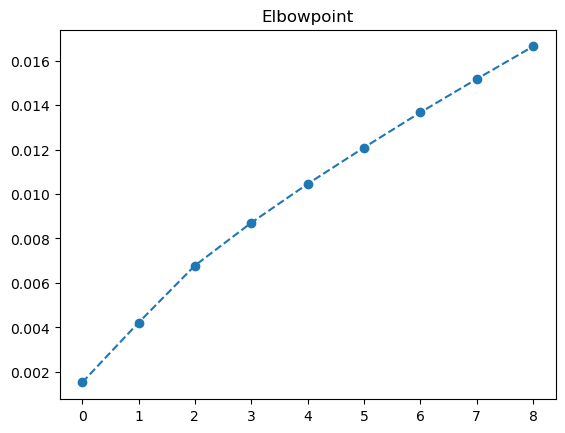

In [3]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Elbowpoint')

In [4]:
svd = TruncatedSVD(n_components=3,n_iter=100, random_state=42)

lsa= svd.fit_transform(tfidf_text)
svd.get_params(deep=True)


{'algorithm': 'randomized',
 'n_components': 3,
 'n_iter': 100,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': 42,
 'tol': 0.0}

In [5]:
# The decomposition 
U= lsa / svd.singular_values_
Sigma = svd.singular_values_ 
V_transpose = svd.components_.T


In [6]:
# Print the topics with their terms
terms = text_vocab

for index, component in enumerate(svd.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:30]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['ukraina', 'sier', 'mener', 'år', 'russland', 'flere', 'russiske', 'putin', 'vladimir', 'president', 'tidligere', 'norge', 'krigen', 'to', 'ekspert', 'russlands', 'haaland', 'erling', 'gammel', 'ukrainske', 'braut', 'får', 'ifølge', 'dagbladet', 'gang', 'fikk', 'norske', 'første', 'kommer', 'norsk']
Topic 1:  ['år', 'gammel', 'haaland', 'erling', 'braut', 'manchester', 'gamle', 'skuespilleren', 'city', '22', 'to', 'mann', 'fikk', 'funnet', 'politiet', 'død', 'døde', 'første', 'united', 'stjerna', '21', 'league', '20', 'tv', 'gang', 'tre', '73', 'fengsel', 'kvinne', 'livet']
Topic 2:  ['haaland', 'erling', 'braut', 'manchester', 'city', '22', 'united', 'league', '21', 'sier', 'premier', 'guardiola', 'pep', 'manager', 'dortmund', 'liverpool', 'haalands', 'ronaldo', 'gunnar', 'fikk', 'spiller', 'cristiano', 'norge', 'ole', 'mål', 'nordmannen', 'solskjær', 'kampen', 'martin', 'champions']


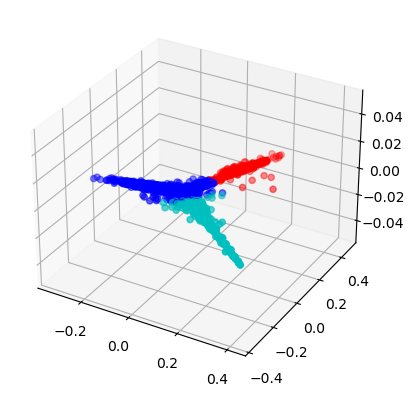

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  

topic_encoded_df = pd.DataFrame(lsa)
topic_encoded_df

kmeans = KMeans(n_clusters=3).fit(topic_encoded_df)
label= kmeans.fit_predict(topic_encoded_df)

df['index']=df.index.values
topic_map = pd.DataFrame()
topic_map['index'] = df.index.values
topic_map['topic'] = kmeans.labels_
df=df.merge(topic_map, on= 'index')

x= df['topic']

pca = PCA(n_components=3)
scatter_plot_points = pca.fit_transform(lsa)

colors = ["r", "b", "c" ]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_axis, y_axis, c=[colors[d] for d in df['topic']])
